
# Wie überprüft man die Signifikanz?

Zur Überprüfung der Signifikanz von Trends und Korrelationen wird üblicherweise versucht, die [Nullhypothese](http://de.wikipedia.org/wiki/Hypothese_%28Statistik%29)  zu widerlegen. Die Nullhypothese besagt, dass sich der Trend bzw. die Korrelation mit einer gewissen Wahrscheinlichkeit $1-p$ aus einer zufälligen Zeitreihe ergibt. Nur wenn es unwahrscheinlich ist, dass die Nullhypothese zutrifft, ist die Beziehung als signifikant zu betrachten.

Als Monte-Carlo Methode bezeichnet man die Erzeugung von zufälligen Eingangs-Daten zur numerischen Datenanalyse. Mittels  Monte-Carlo Methode können statistische Hypothesen-Tests durchgeführt werden. Indem ein numerisches Experiment wiederholt durchgeführt wird, kann die Anzahl von Ereignissen (z.B. die Korrelation liegt über einem bestimmten Wert) gezählt werden. Diese Vorgehensweise erlaubt einen intuitiven Zugang zur Statistik ohne den Gebrauch theoretischer Verteilungsfunktionen.

## Monte-Carlo  Methode


In [22]:
%pylab inline
d=loadtxt('september_extent_1972_2014.txt')[0:21,1] # 21 Jahre von 1972-1992

Populating the interactive namespace from numpy and matplotlib


In [15]:
d

array([ 7.29,  7.67,  7.47,  7.3 ,  7.34,  7.24,  7.86,  7.2 ,  7.85,
        7.25,  7.45,  7.52,  7.17,  6.93,  7.54,  7.48,  7.49,  7.04,
        6.24,  6.55,  7.55])

In [12]:
size(d) 

21

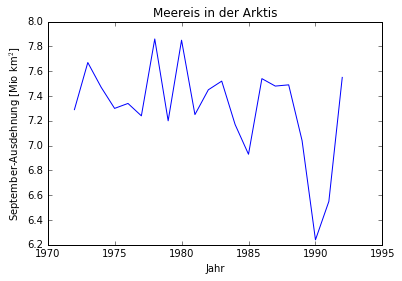

In [16]:
x=linspace(1972,1992,size(d))
plot(x,d)
xlabel('Jahr')
ylabel('September-Ausdehnung [Mio km$^2$]')
title('Meereis in der Arktis')

In [17]:
print(d)
print(mean(d),var(d))

[ 7.29  7.67  7.47  7.3   7.34  7.24  7.86  7.2   7.85  7.25  7.45  7.52
  7.17  6.93  7.54  7.48  7.49  7.04  6.24  6.55  7.55]
7.30619047619 0.141233106576


In [18]:
shuffle(d) # Zufällige Umsortierung, Mittelwert und Varianz bleiben erhalten
print(d)
print(mean(d),var(d))

[ 7.24  7.25  7.04  7.45  7.52  7.55  7.54  7.17  6.24  7.86  7.3   7.29
  7.2   7.47  7.48  7.49  6.55  7.85  6.93  7.67  7.34]
7.30619047619 0.141233106576


In [19]:
d2=randn(21)
d2=d2*std(d)/std(d2) # Normiere mit Standardabweichung
d2=d2+mean(d-d2) # Anpassen von Mittelwert
print('Ursprüngliche Daten:')
print(d)
print(mean(d),var(d))
print('---------------------------------------------------')
print('Zufällige Daten mit gleichen Mittelwert und Varianz')
print(d2)
print(mean(d2),var(d2))
d2=(d2*10.0).astype(int)/10.0 
print('---------------------------------------------------')
print('Zufällige Daten (gerundet) mit ähnlichen Mittelwert und Varianz')
print(d2)
print(mean(d2),var(d2))
print('---------------------------------------------------')

Ursprüngliche Daten:
[ 7.24  7.25  7.04  7.45  7.52  7.55  7.54  7.17  6.24  7.86  7.3   7.29
  7.2   7.47  7.48  7.49  6.55  7.85  6.93  7.67  7.34]
7.30619047619 0.141233106576
---------------------------------------------------
Zufällige Daten mit gleichen Mittelwert und Varianz
[ 6.99945432  7.44317147  6.892913    7.33905714  7.00154378  7.25316664
  7.57096758  7.34487733  6.8197436   7.50342683  7.42523574  7.17170962
  6.43933415  7.56857043  7.4546292   7.87374163  7.60624502  7.66340624
  6.93263709  7.03746452  8.08870466]
7.30619047619 0.141233106576
---------------------------------------------------
Zufällige Daten (gerundet) mit ähnlichen Mittelwert und Varianz
[ 6.9  7.4  6.8  7.3  7.   7.2  7.5  7.3  6.8  7.5  7.4  7.1  6.4  7.5  7.4
  7.8  7.6  7.6  6.9  7.   8. ]
7.25714285714 0.13768707483
---------------------------------------------------


## Sind zwei Mittelwerte verschieden?

Um zu überprüfen, ob möglicherweise ein Trend vorliegt, vergleichen wir zunächst zwei Mittelwerte. Sind die beiden Zeitabschnitte signifikant verschieden, könnte ein Trend vorliegen:

 *  1972-1982
 *  1982-1992
 

In [23]:
print(mean(d[0:10]))
print(mean(d[10:20]))

7.447
7.141


### Aufgabe

Die zwei Mittelwerte sind verschieden. Doch ist das Ergebnis auch signifikant? Könnte es rein zufällig sein?
Testen Sie die Signifikanz des Unterschieds. Formulieren Sie eine Nullhypothese. Setzen sie die Monte-Carlo Methode ein und beschreiben Sie den Unterschied quantitativ.